In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import API key
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | khormuj
City not found. Skipping...
Processing Record 6 of Set 1 | sorland
Processing Record 7 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 1 | gazojak
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | coahuayana
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | bargi
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | zambezi
Processing Record 20 of Set 1 | oli

Processing Record 34 of Set 4 | port elizabeth
Processing Record 35 of Set 4 | port hardy
Processing Record 36 of Set 4 | port hawkesbury
Processing Record 37 of Set 4 | falealupo
City not found. Skipping...
Processing Record 38 of Set 4 | idenao
Processing Record 39 of Set 4 | vestmanna
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | narimanov
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | santa catarina de tepehuanes
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | holland
Processing Record 48 of Set 4 | straumen
Processing Record 49 of Set 4 | krizevci
Processing Record 50 of Set 4 | santa marta
Processing Record 1 of Set 5 | dikson
Processing Record 2 of Set 5 | opuwo
Processing Record 3 of Set 5 | warqla
City not found. Skipping...
Processing Record 4 of Set 5 | vao
Processing Record 5 of Set 5 | gravdal
Processing Record 

Processing Record 22 of Set 8 | tuatapere
Processing Record 23 of Set 8 | goderich
Processing Record 24 of Set 8 | ternate
Processing Record 25 of Set 8 | noumea
Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | aitape
Processing Record 28 of Set 8 | juegang
Processing Record 29 of Set 8 | taloda
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | jamtara
Processing Record 32 of Set 8 | moron
Processing Record 33 of Set 8 | havelock
Processing Record 34 of Set 8 | baruun-urt
Processing Record 35 of Set 8 | port-gentil
Processing Record 36 of Set 8 | awjilah
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | magistralnyy
Processing Record 40 of Set 8 | aleksandrov gay
Processing Record 41 of Set 8 | narrabri
Processing Record 42 of Set 8 | mareeba
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | mizdah
Processing Record 45 of Set 8 | general roca
Proces

Processing Record 15 of Set 12 | boyolangu
Processing Record 16 of Set 12 | tateyama
Processing Record 17 of Set 12 | terrace bay
Processing Record 18 of Set 12 | challans
Processing Record 19 of Set 12 | waddan
Processing Record 20 of Set 12 | burkhala
City not found. Skipping...
Processing Record 21 of Set 12 | parkes
Processing Record 22 of Set 12 | jardim
Processing Record 23 of Set 12 | hasan abdal
Processing Record 24 of Set 12 | benghazi
Processing Record 25 of Set 12 | paris
Processing Record 26 of Set 12 | margate
Processing Record 27 of Set 12 | tuy hoa
Processing Record 28 of Set 12 | ust-nera
Processing Record 29 of Set 12 | basoko
Processing Record 30 of Set 12 | sataua
City not found. Skipping...
Processing Record 31 of Set 12 | pyshma
Processing Record 32 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 33 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 12 | olafsvik
Processing Record 35 of Set 12 | havoysund
Processing Re

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,33.96,62,0,0.22,GL,2021-10-12 19:35:01
1,Atuona,-9.8000,-139.0333,77.41,77,9,18.66,PF,2021-10-12 19:35:02
2,Sorland,67.6670,12.6934,41.07,63,100,15.68,NO,2021-10-12 19:35:03
3,Gazojak,41.1875,61.4036,51.08,31,0,11.45,TM,2021-10-12 19:35:04
4,Zhigansk,66.7697,123.3711,14.74,96,100,5.37,RU,2021-10-12 19:35:04
5,Geraldton,-28.7667,114.6000,50.41,76,4,11.50,AU,2021-10-12 19:31:26
6,Coahuayana,18.7333,-103.6833,89.08,62,99,5.32,MX,2021-10-12 19:35:05
7,Lasa,46.6166,10.7002,47.28,95,79,6.04,IT,2021-10-12 19:35:06
8,Mahebourg,-20.4081,57.7000,73.69,94,75,6.91,MU,2021-10-12 19:35:07
9,Khatanga,71.9667,102.5000,11.93,96,99,7.11,RU,2021-10-12 19:35:07


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-10-12 19:35:01,65.6145,-37.6368,33.96,62,0,0.22
1,Atuona,PF,2021-10-12 19:35:02,-9.8000,-139.0333,77.41,77,9,18.66
2,Sorland,NO,2021-10-12 19:35:03,67.6670,12.6934,41.07,63,100,15.68
3,Gazojak,TM,2021-10-12 19:35:04,41.1875,61.4036,51.08,31,0,11.45
4,Zhigansk,RU,2021-10-12 19:35:04,66.7697,123.3711,14.74,96,100,5.37
5,Geraldton,AU,2021-10-12 19:31:26,-28.7667,114.6000,50.41,76,4,11.50
6,Coahuayana,MX,2021-10-12 19:35:05,18.7333,-103.6833,89.08,62,99,5.32
7,Lasa,IT,2021-10-12 19:35:06,46.6166,10.7002,47.28,95,79,6.04
8,Mahebourg,MU,2021-10-12 19:35:07,-20.4081,57.7000,73.69,94,75,6.91
9,Khatanga,RU,2021-10-12 19:35:07,71.9667,102.5000,11.93,96,99,7.11


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

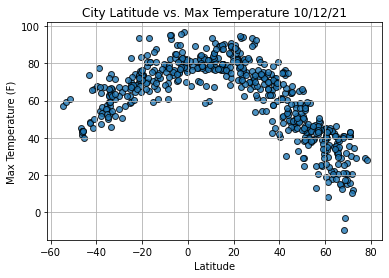

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

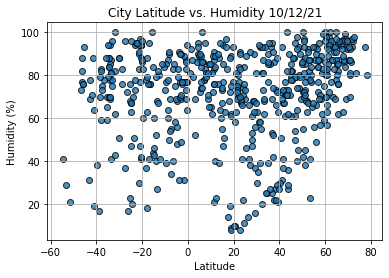

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

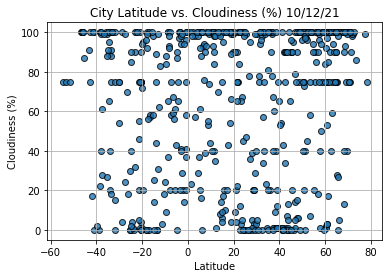

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

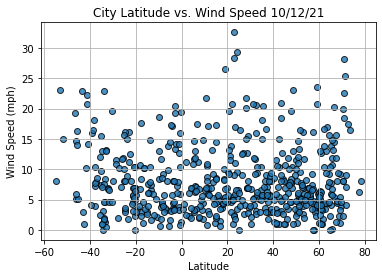

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                      Zambezi
Country                        ZM
Date          2021-10-12 19:35:09
Lat                      -13.5432
Lng                       23.1047
Max Temp                    71.51
Humidity                       27
Cloudiness                      0
Wind Speed                   6.55
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
555     True
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

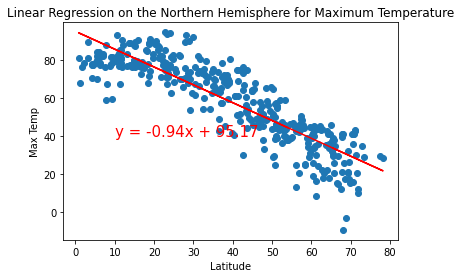

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

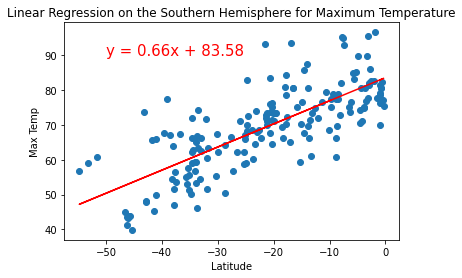

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

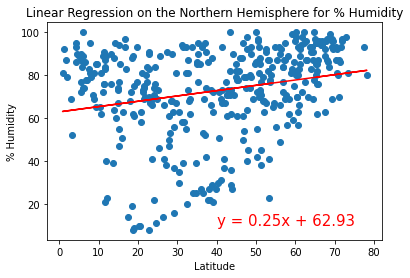

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

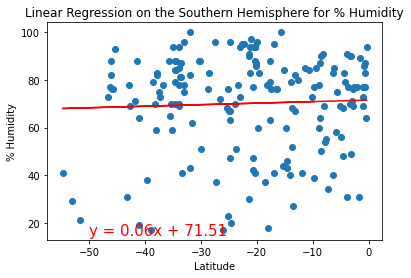

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

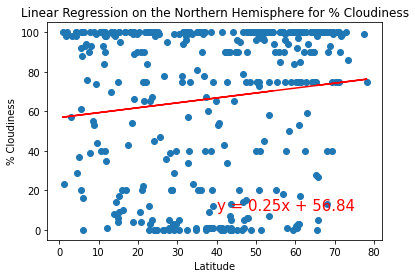

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

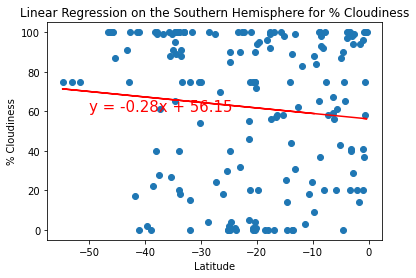

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

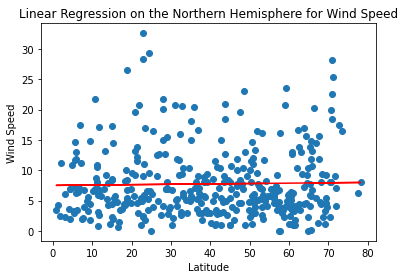

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

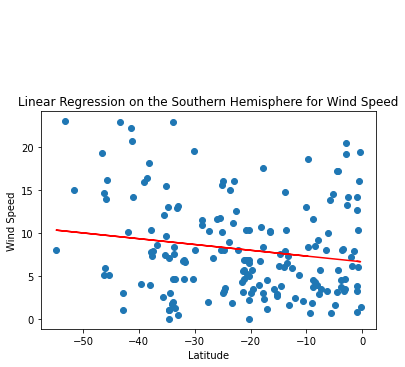

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))